In [1]:
import numpy as np
import matplotlib.pyplot as plt
import less

In [2]:
np.random.seed(42)

x = np.linspace(0, 2*np.pi, 50)
y = np.sin(x)

y2 = y + 0.1 * np.random.normal(size=x.shape)
mask = np.abs(y-y2) > 0.18

# tweak one point to be better within bounds
i = [i for i,e in enumerate(mask) if e][-1]
y2[i] += 2*(y[i]-y2[i])

typical_x,typical_y = x[mask],y2[mask]
outlier_x,outlier_y = x[mask == False],y2[mask == False]

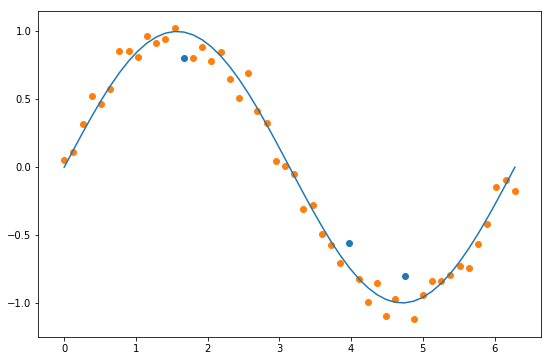

In [3]:
plt.figure(figsize=(9,6))

plt.plot(x, y)
plt.scatter(typical_x, typical_y)
plt.scatter(outlier_x, outlier_y)

plt.show()

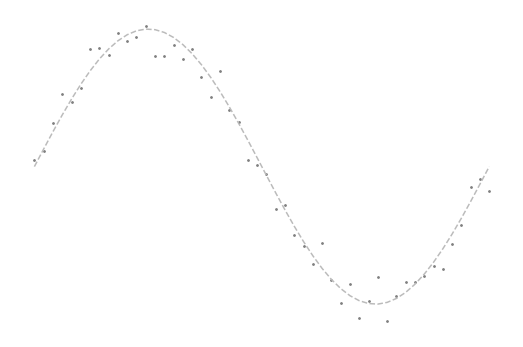

In [4]:
chart = less.Chart(9,6)

chart.plot(x, y)

chart.scatter(typical_x, typical_y)
chart.scatter(outlier_x, outlier_y)

chart.render()


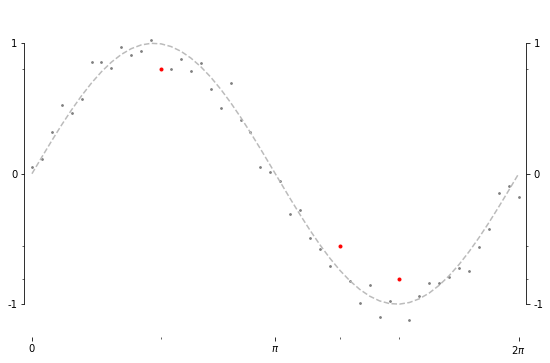

In [5]:
import less

chart = less.Chart(9,6)

chart.plot(x, y)

chart.scatter(typical_x, typical_y, style='highlight')
chart.scatter(outlier_x, outlier_y, style='background')

chart.spine.left.visible(True)
chart.spine.left.ticks.major([-1,0,1])
chart.spine.left.ticks.minor(y2[mask])

chart.spine.right.visible(True)
chart.spine.right.ticks.major([-1,0,1])
chart.spine.right.ticks.minor(y2[mask])

chart.spine.bottom.ticks.major([0, np.pi, 2*np.pi],
                               labels=['0', '$\pi$', '2$\pi$'])
chart.spine.bottom.ticks.minor(x[mask])

chart.xlim((-0.1, 2*np.pi+0.1))
chart.ylim((-1.25,1.25))

chart.render()